In [2]:
import numpy as np
import pandas as pd
import torch

In [3]:
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('png')
plt.rcParams['figure.dpi'] = 300 
plt.rcParams['savefig.dpi'] = 300 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR

In [1]:
data = pd.read_csv('/Users/youkipepper/Desktop/torch/data_hn/hn_01-02/hn_01-02_2024-01-25.csv', usecols= [3]).values.reshape(-1)


NameError: name 'pd' is not defined

In [ ]:
sample_num = data.shape[0]
predict_step = 15
predict_num = 1

In [5]:
data_set = []
for i in range(sample_num - predict_step - predict_num + 1):
    data_set.append(data[i:i + predict_step + predict_num])
data_set = np.array(data_set)
data_set.shape

(1992, 16)

In [6]:
# split data
train_set, test_set = data_set[:int(data_set.shape[0] * 0.7)], data_set[int(data_set.shape[0] * 0.7):]
x_train, y_train = train_set[:, :-1], train_set[:, -1].reshape(-1, 1)
x_test, y_test = test_set[:, :-1], test_set[:, -1].reshape(-1, 1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1394, 15), (1394, 1), (598, 15), (598, 1))

In [7]:
# Nomalization
scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train)
x_test = scaler.fit_transform(x_test)
y_test = scaler.fit_transform(y_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1394, 15), (1394, 1), (598, 15), (598, 1))

In [8]:
# transfrom to tensor
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [9]:
svr = SVR(kernel='rbf', C=4.0, gamma=0.8, epsilon=0.01)
svr.fit(x_train, y_train)

/Users/youkipepper/anaconda3/envs/py3x/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=4.0, epsilon=0.01, gamma=0.8)

In [10]:
# predict
res_train = svr.predict(x_train)
res_test = svr.predict(x_test)

In [11]:
res_train = scaler.inverse_transform(res_train.reshape(-1, 1)).flatten()
res_test = scaler.inverse_transform(res_test.reshape(-1, 1)).flatten()
y_train_original = scaler.inverse_transform(y_train).flatten()
y_test_original = scaler.inverse_transform(y_test).flatten()
res_train.shape, res_test.shape, y_train_original.shape, y_test_original.shape

((1394,), (598,), (1394,), (598,))

In [12]:
train_error = mean_squared_error(y_train_original, res_train)
test_error = mean_squared_error(y_test_original, res_test)

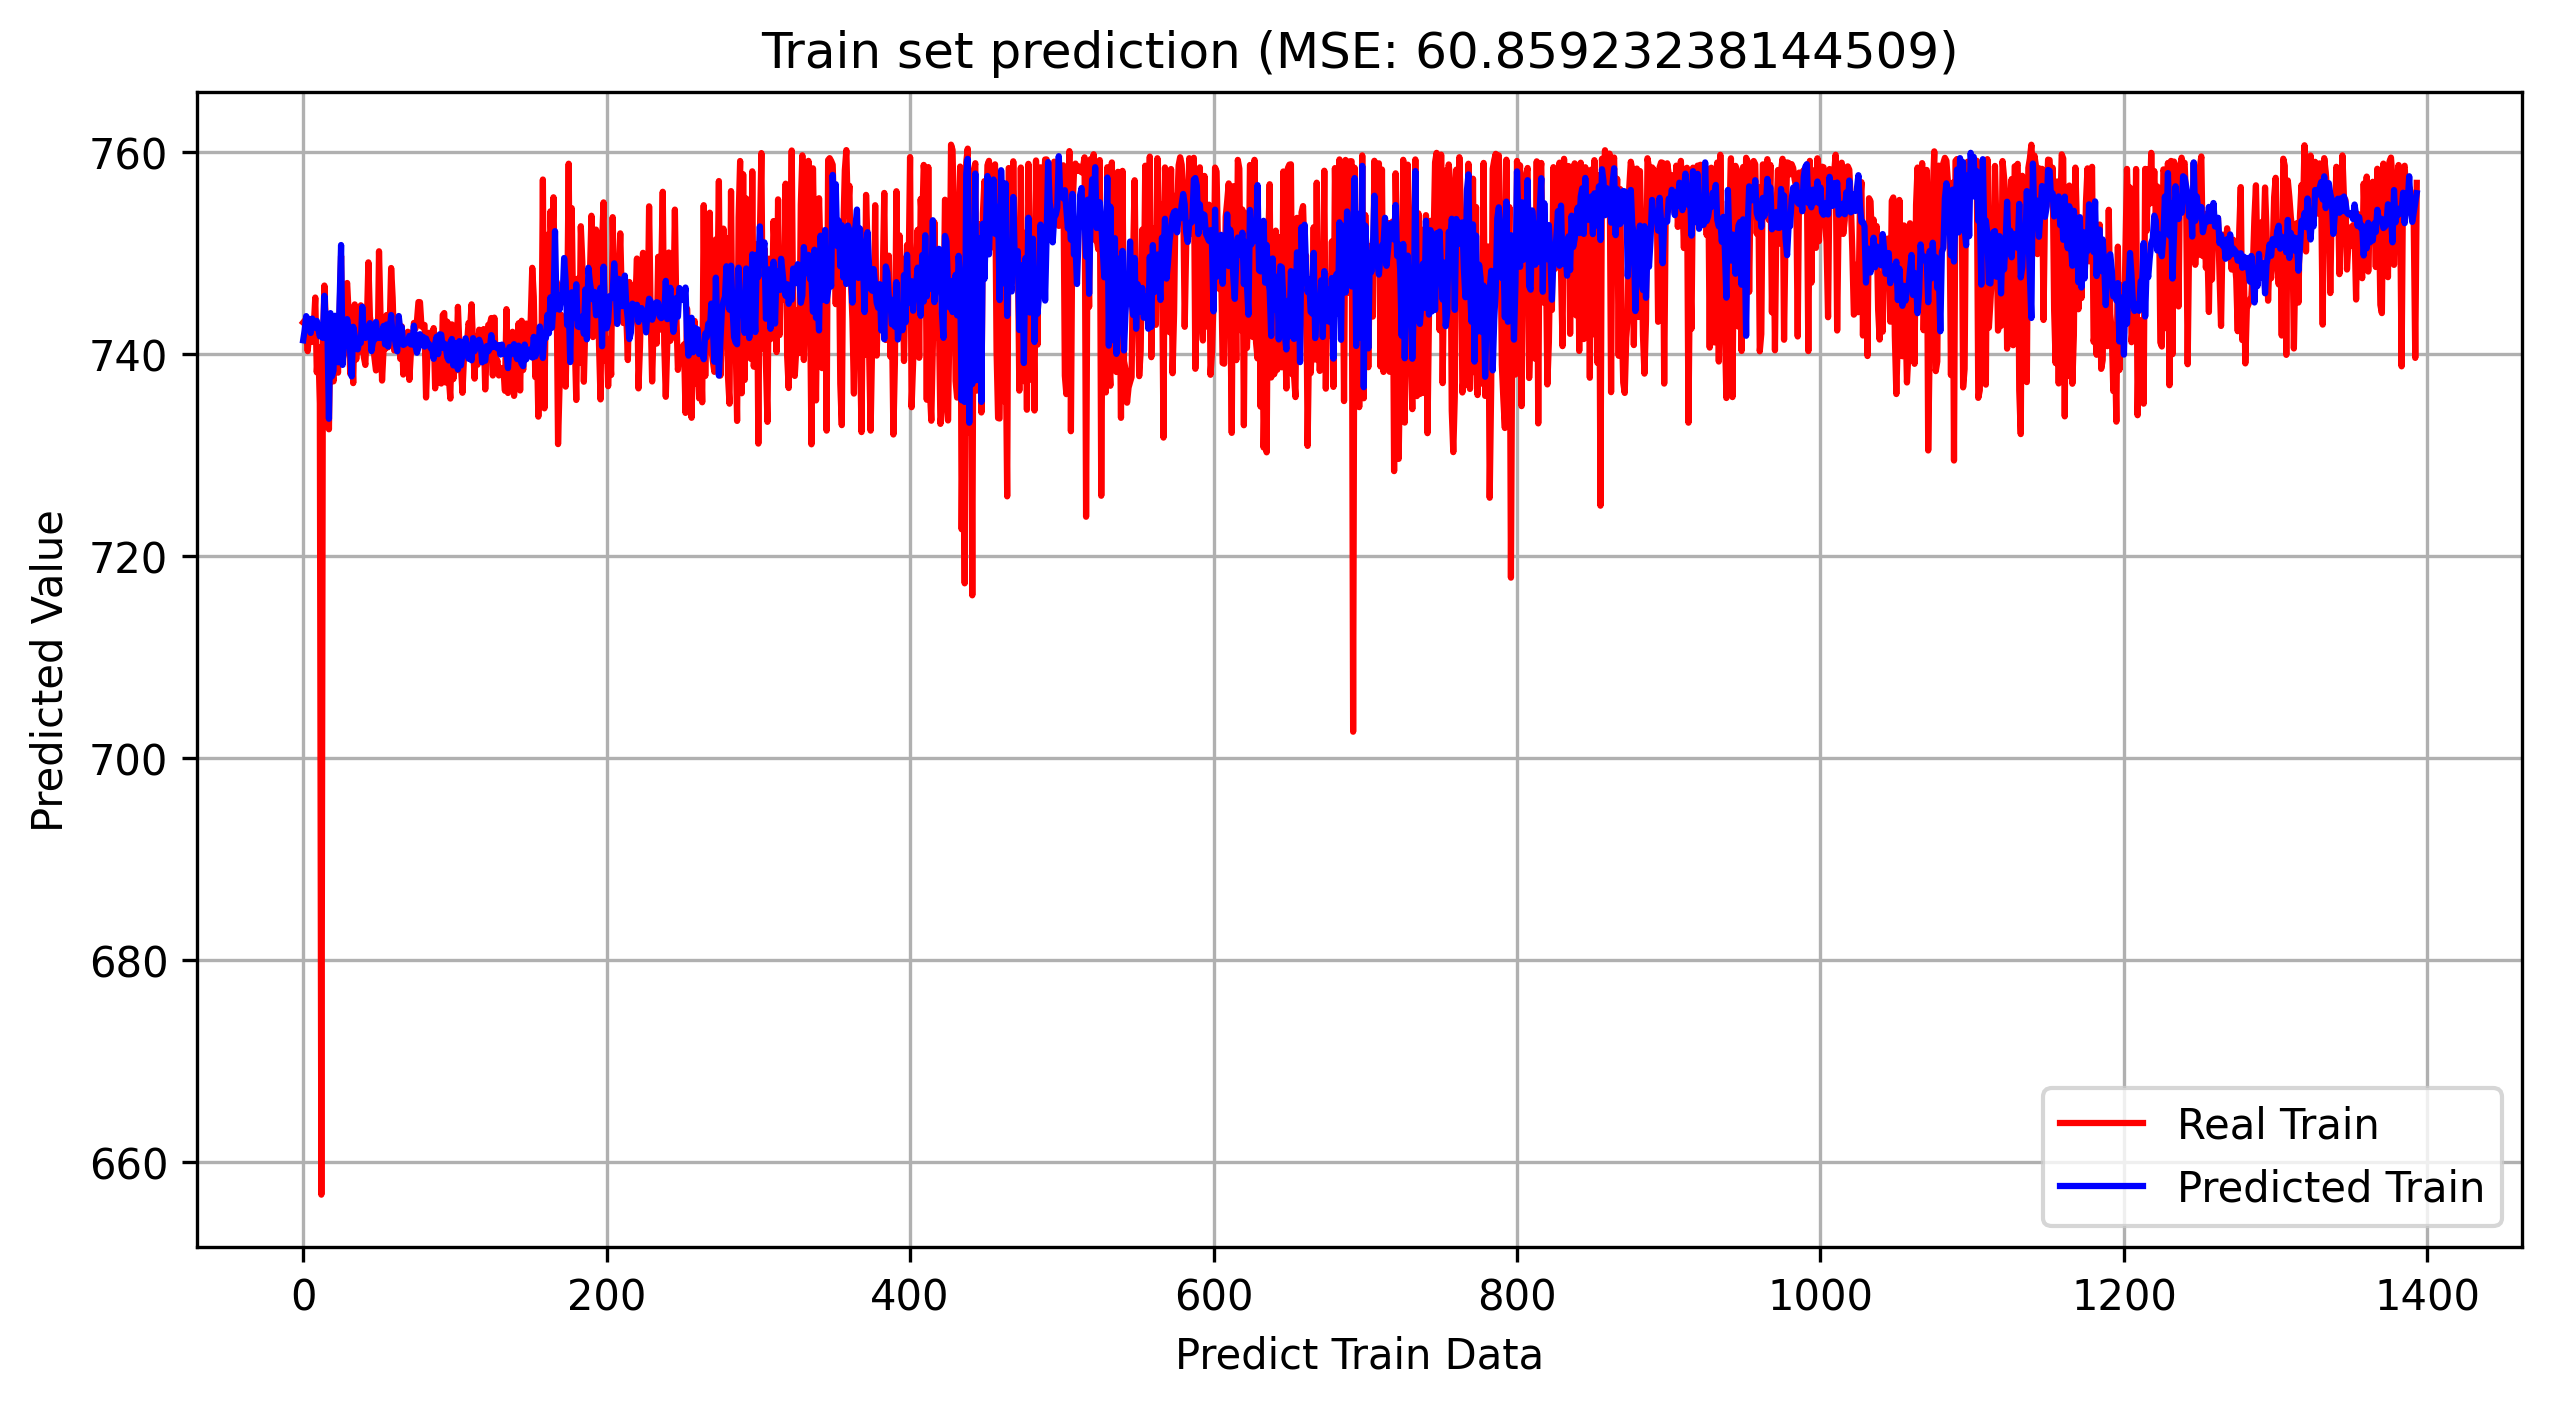

In [13]:
plt.figure(figsize=(10,5))
plt.plot(y_train_original, 'r-', label= 'Real Train')
plt.plot(res_train, 'b-', label = 'Predicted Train')
plt.legend()
plt.xlabel('Predict Train Data')
plt.ylabel('Predicted Value')
plt.title(f'Train set prediction (MSE: {train_error})')
plt.grid()
plt.show()

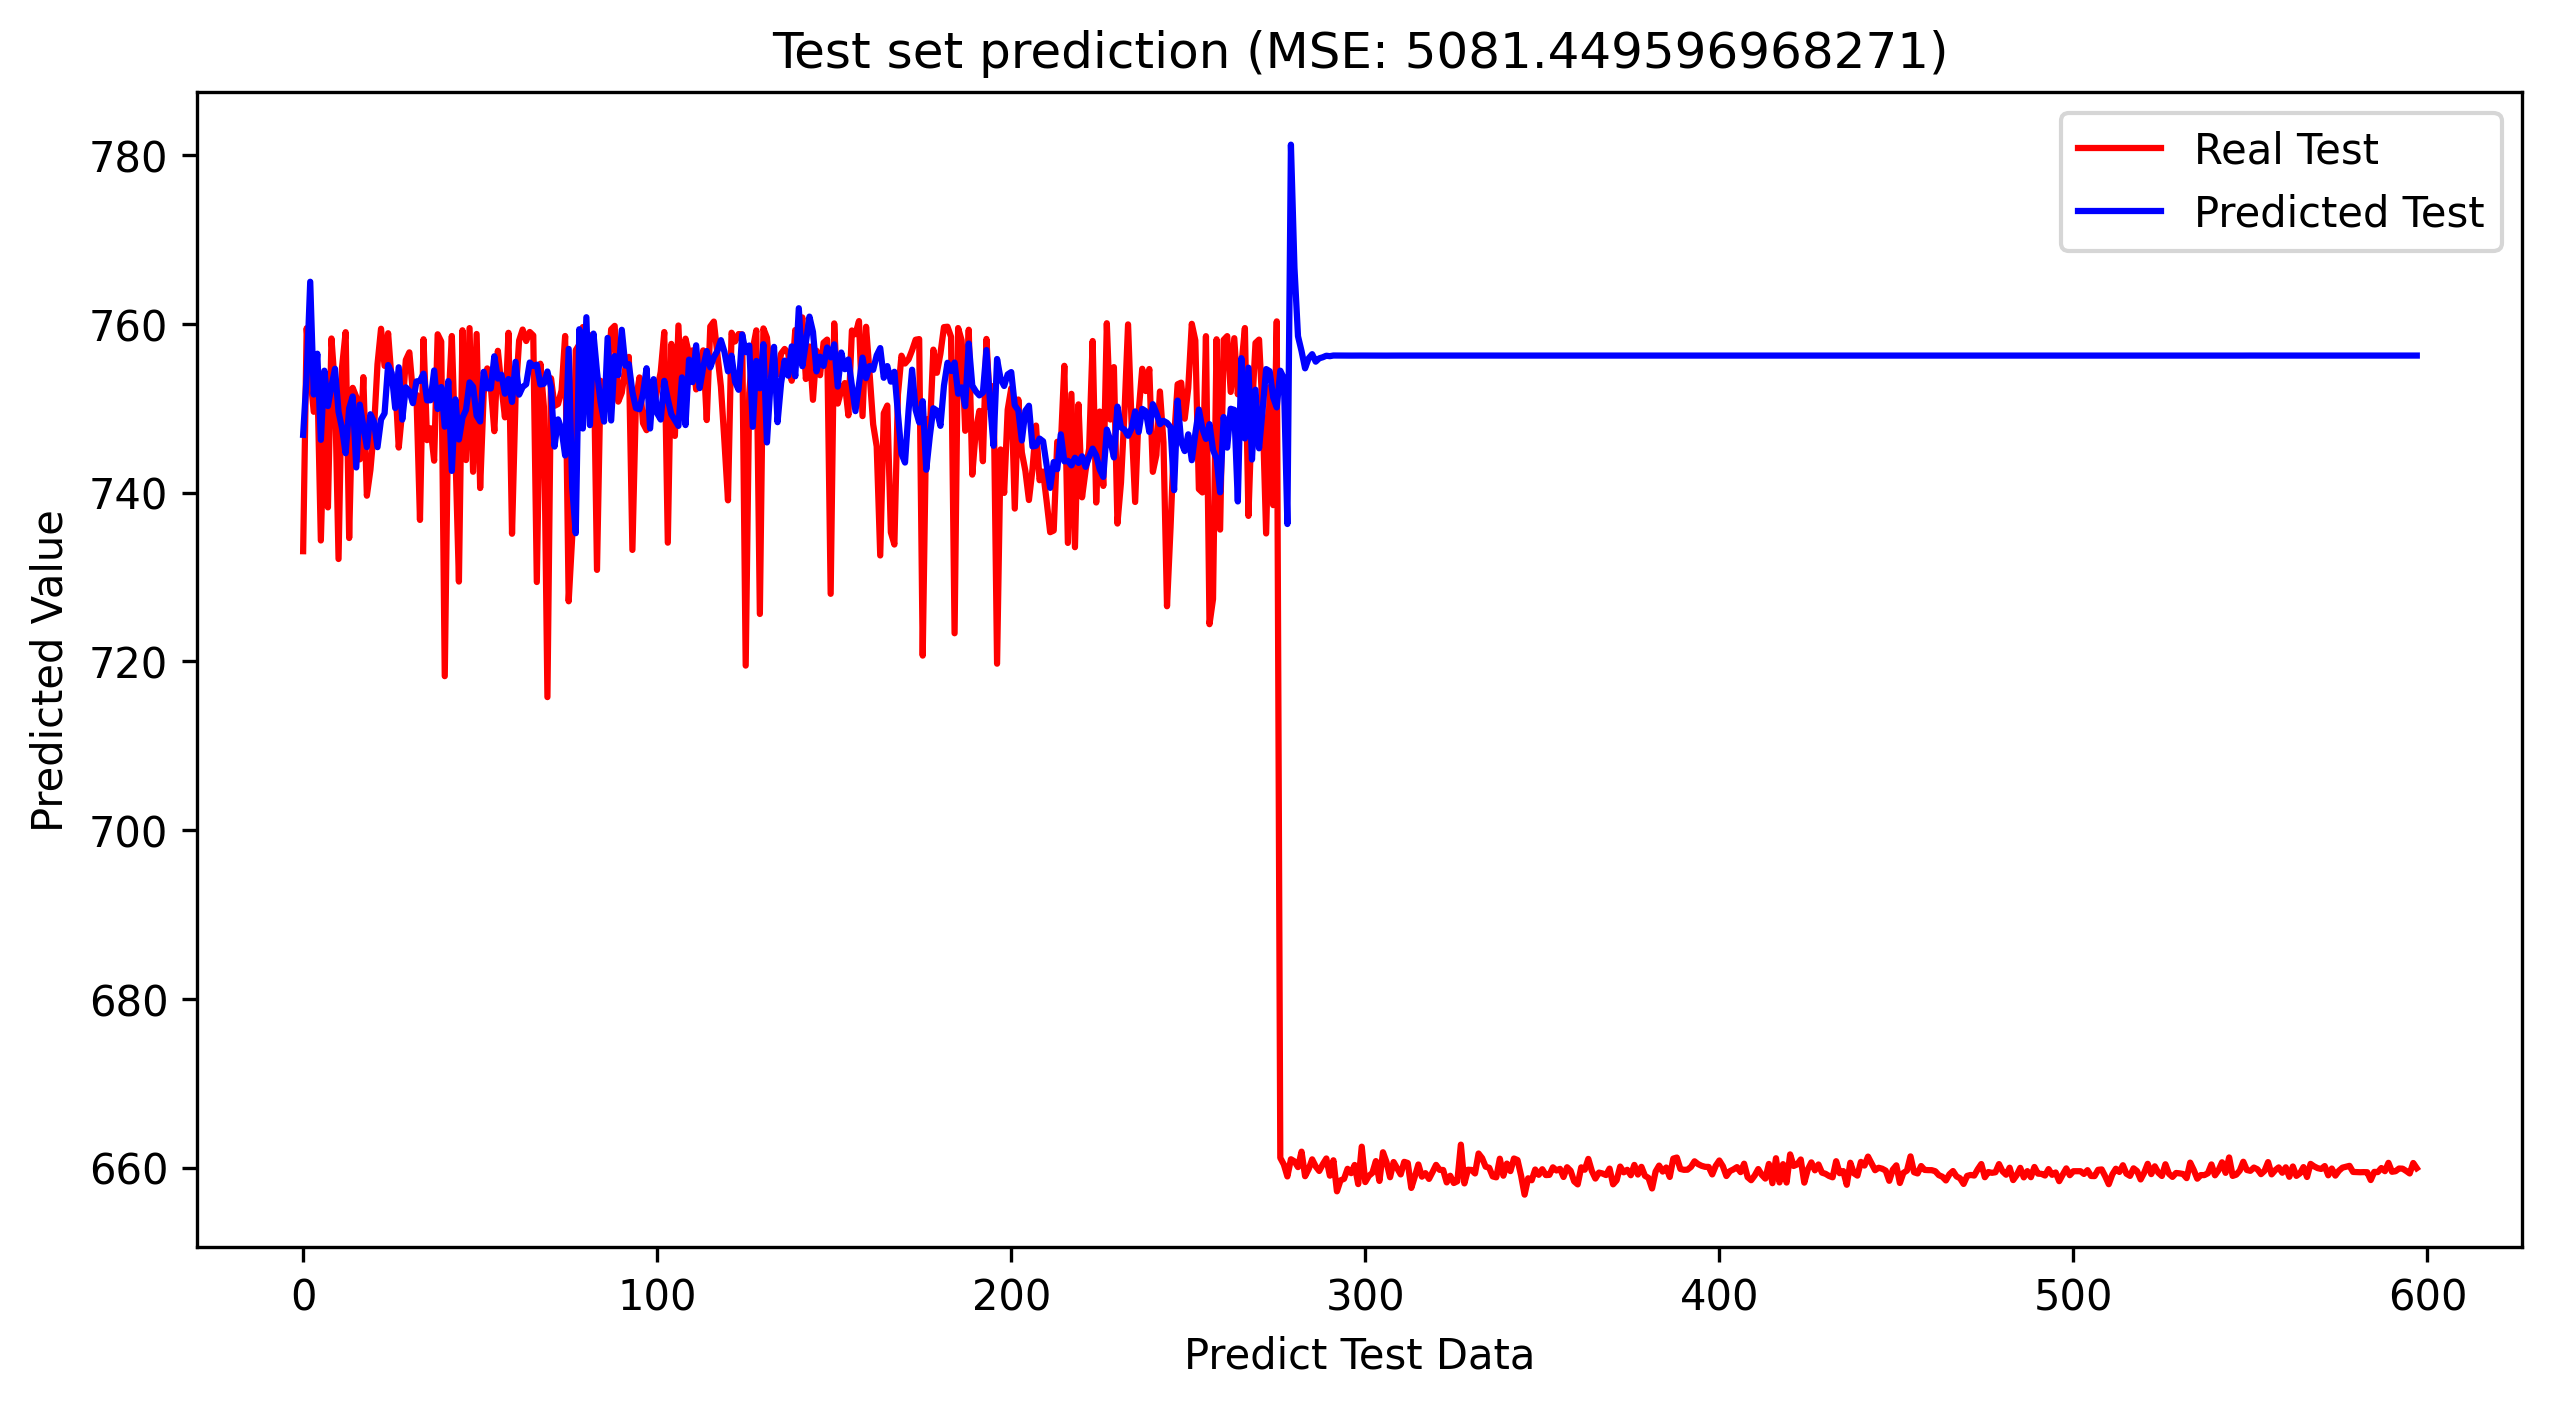

In [14]:
plt.figure(figsize=(10,5))
plt.plot(y_test_original, 'r-', label= 'Real Test')
plt.plot(res_test, 'b-', label = 'Predicted Test')
plt.legend()
plt.xlabel('Predict Test Data')
plt.ylabel('Predicted Value')
plt.title(f'Test set prediction (MSE: {test_error})')
plt.grid(False)
plt.show()

In [15]:
train_r2 = r2_score(y_train_original, res_train)
test_r2 = r2_score(y_test_original, res_test)
train_mae = mean_absolute_error(y_train_original, res_train)
test_mae = mean_absolute_error(y_test_original, res_test)
train_mbe = np.mean(y_train_original - res_train)
test_mbe = np.mean(y_test_original - res_test)
print(f'Train R2: {train_r2}, Test R2: {test_r2}')
print(f'Train MAE: {train_mae}, Test MAE: {test_mae}')
print(f'Train MBE: {train_mbe}, Test MBE: {test_mbe}')

Train R2: 0.23239502621100927, Test R2: -1.469366595720944
Train MAE: 5.581926303052199, Test MAE: 55.51449051443629
Train MBE: -0.8756365370025466, Test MBE: -52.62835426443678


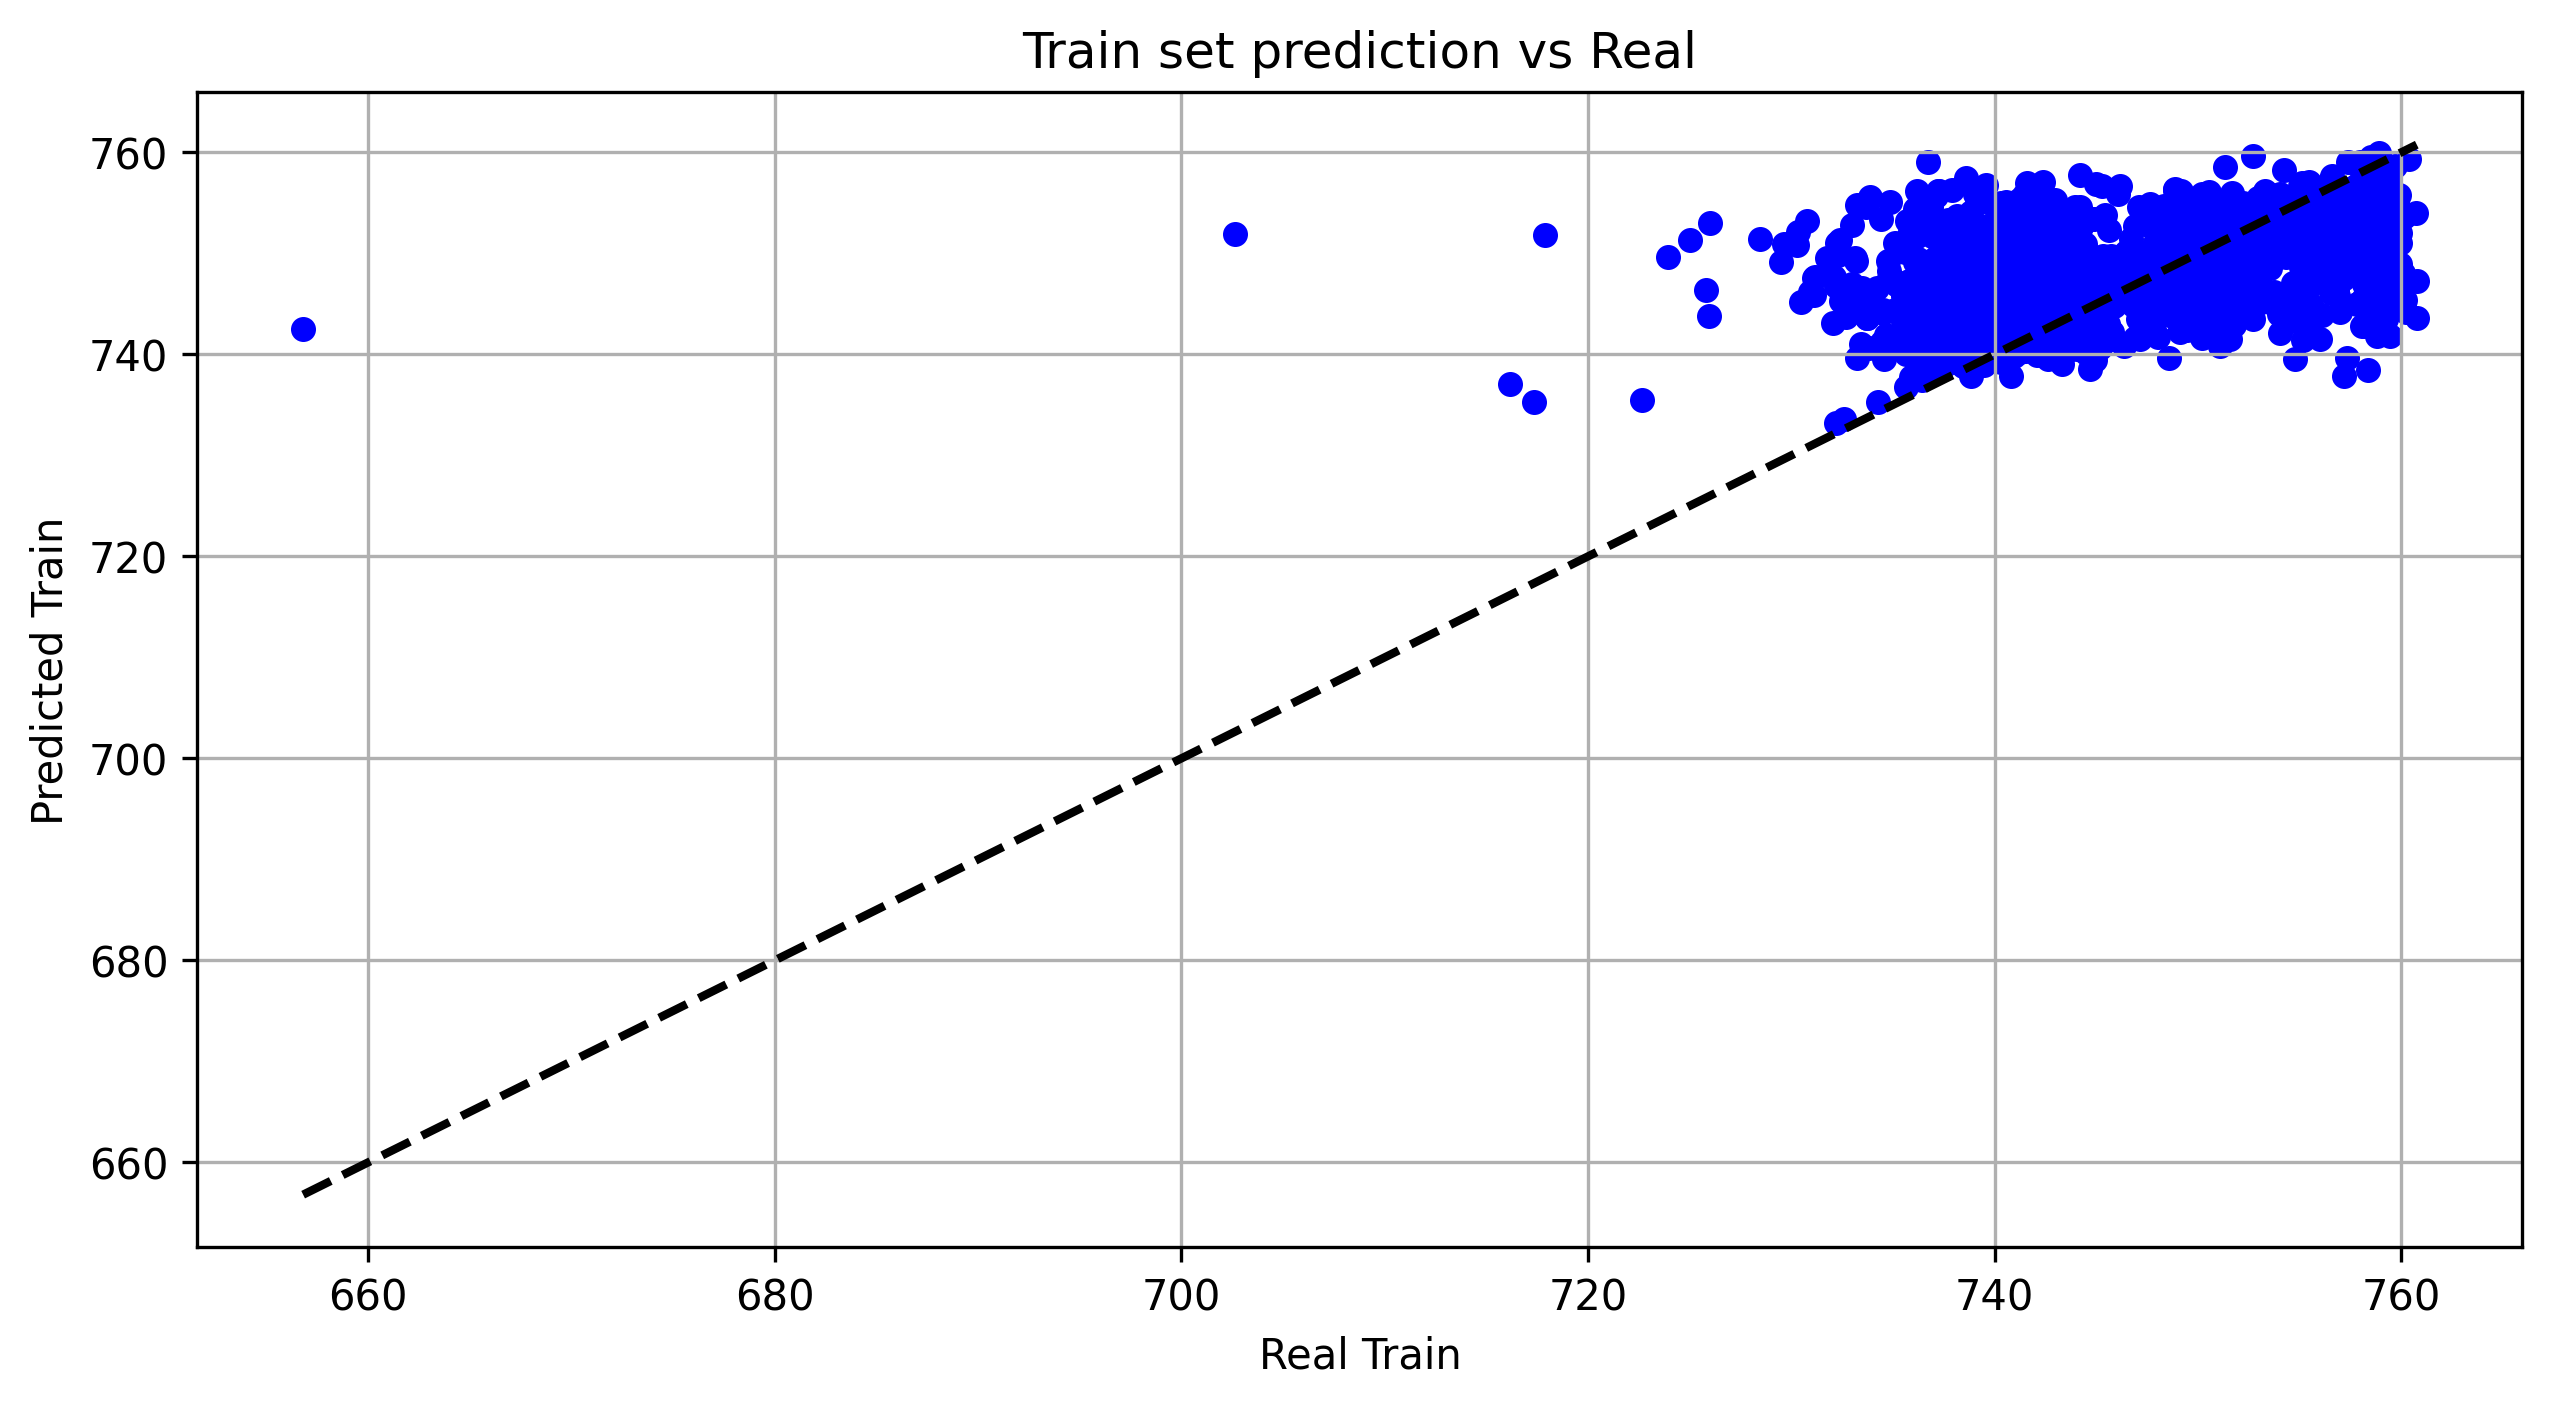

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(y_train_original, res_train, c='b', s=25)
plt.plot([y_train_original.min(), y_train_original.max()], [y_train_original.min(), y_train_original.max()], 'k--', lw=2)
plt.xlabel('Real Train')
plt.ylabel('Predicted Train')
plt.title(f'Train set prediction vs Real')
plt.grid()
plt.show()

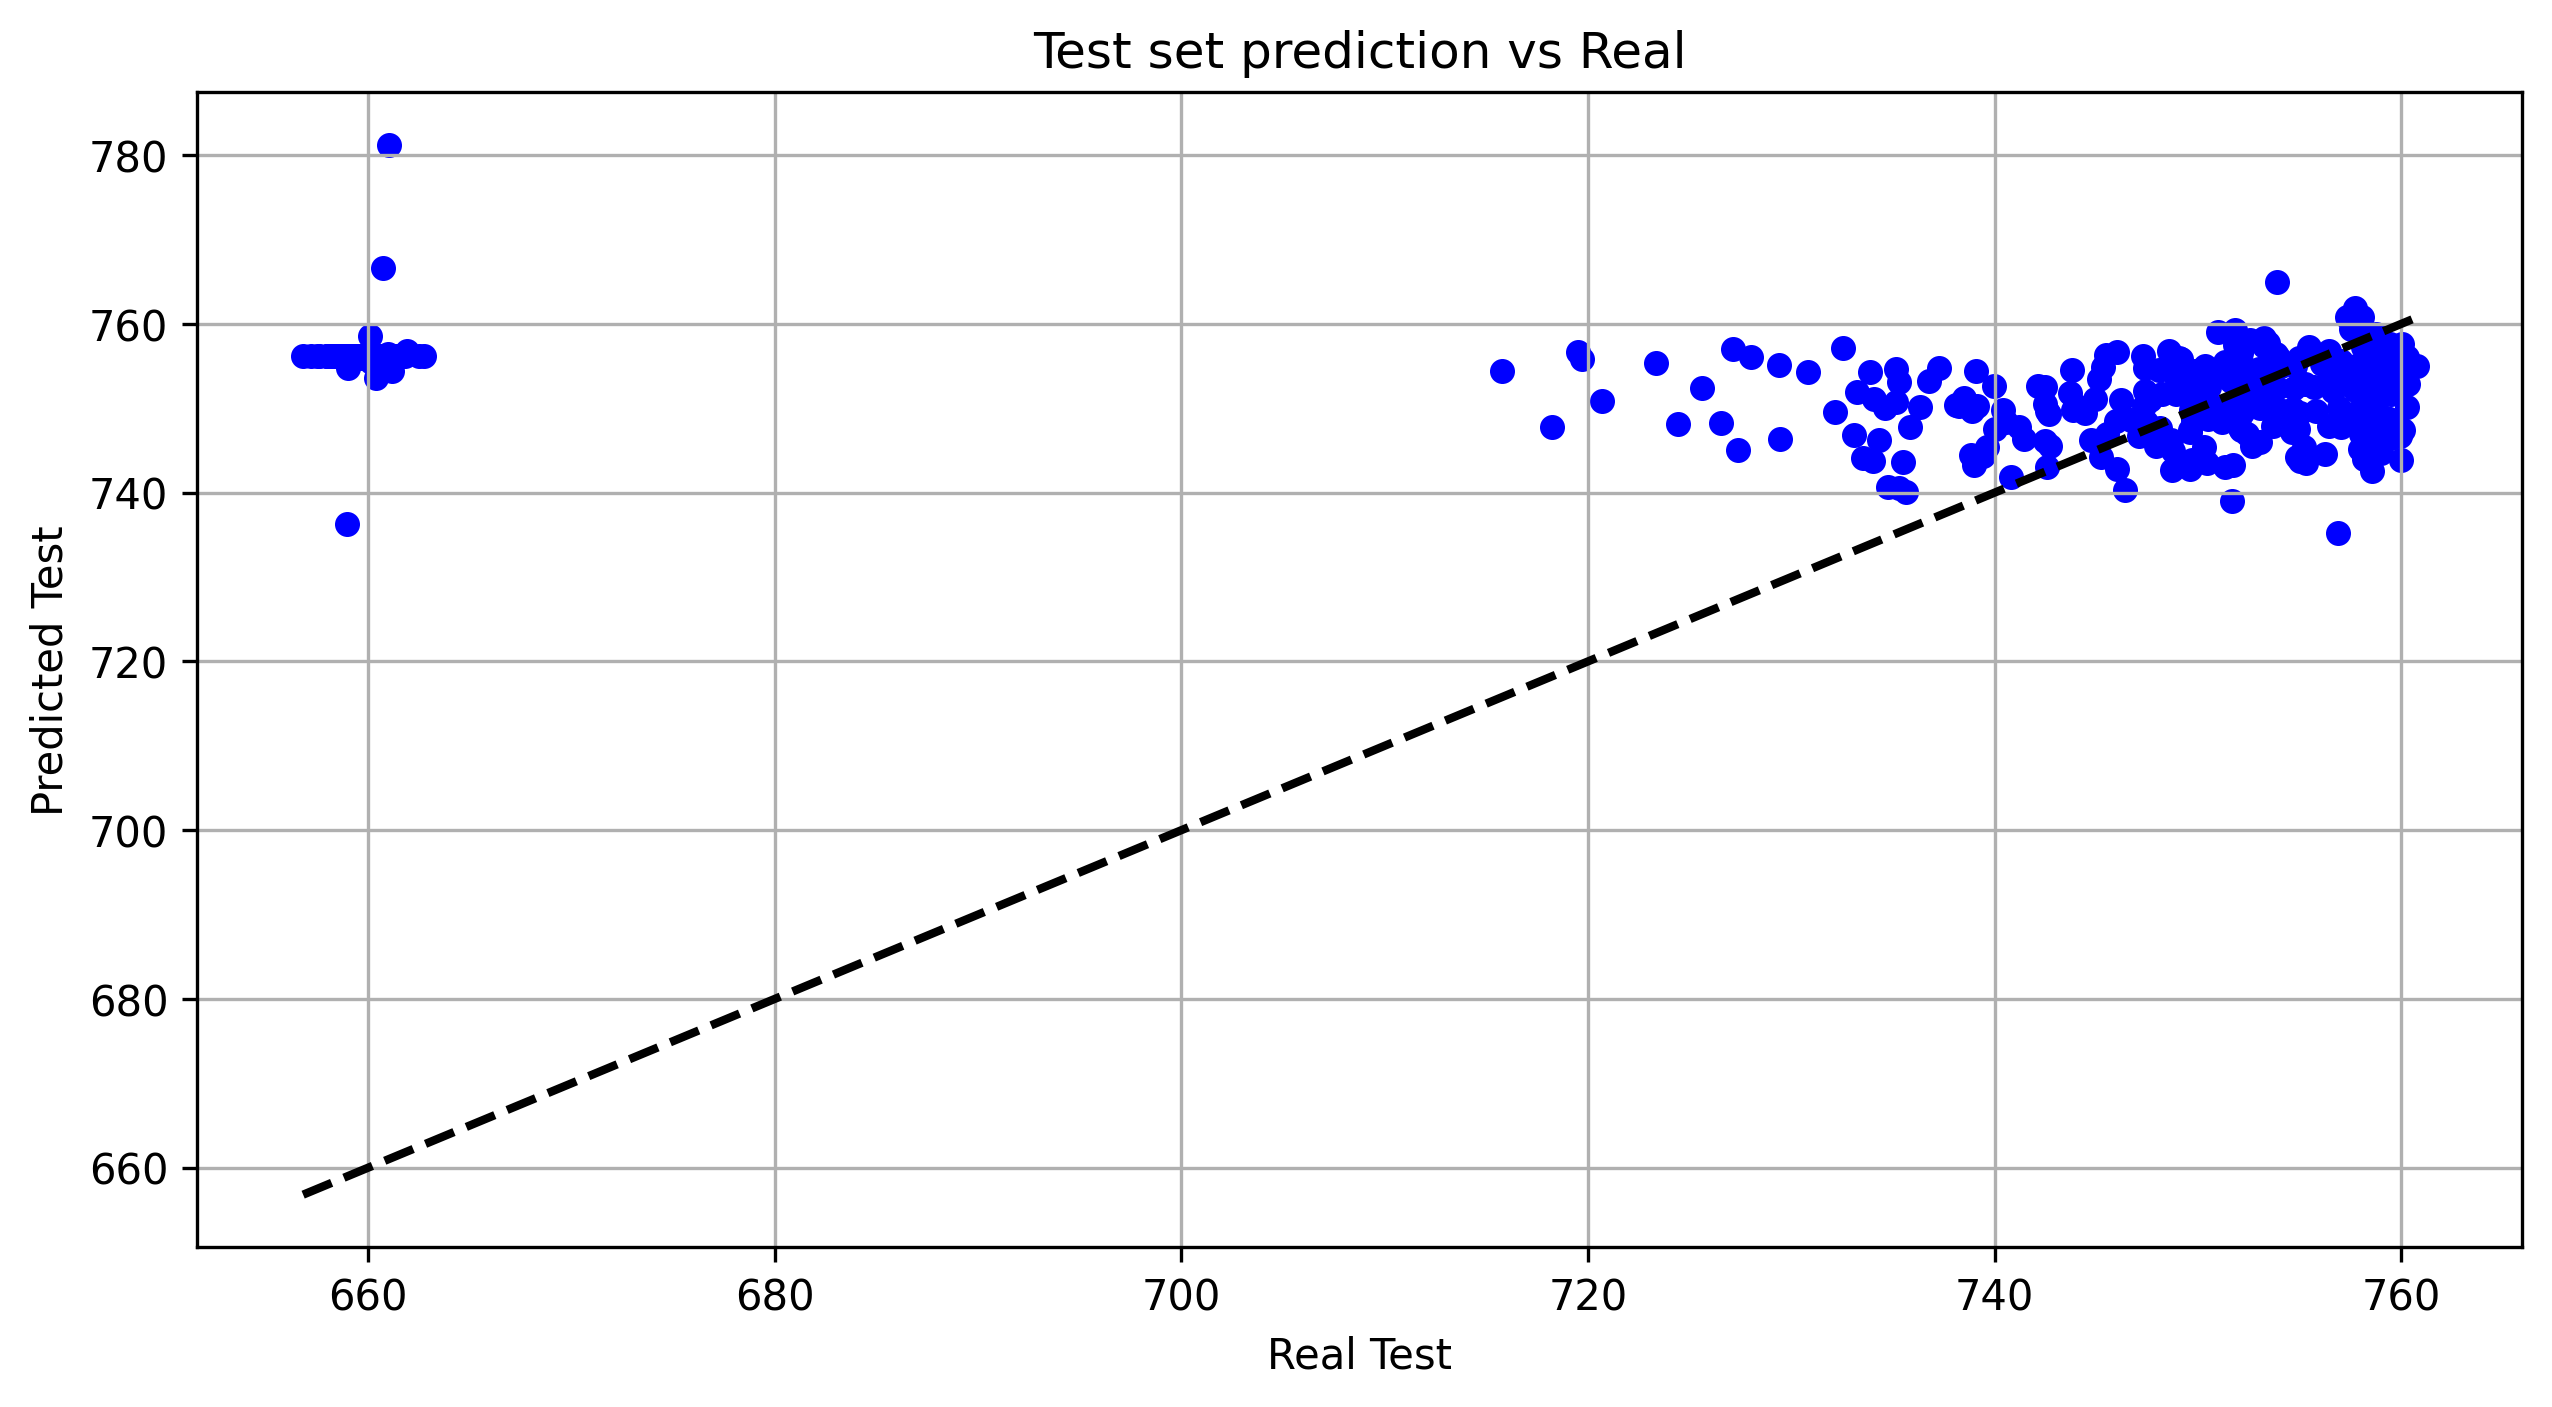

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(y_test_original, res_test, c='b', s=25)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'k--', lw=2)
plt.xlabel('Real Test')
plt.ylabel('Predicted Test')
plt.title(f'Test set prediction vs Real')
plt.grid()
plt.show()